<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/Experiment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PID and Adaptive PID-RMSProp

1.   Trying to observe the convergence.
2.   Compare with Adaptive PID(made with same concept used in RMSProp.)
3.   Trying to understand the overshoot problem.

#Update rule for our new Adaptive - RMSProp: 
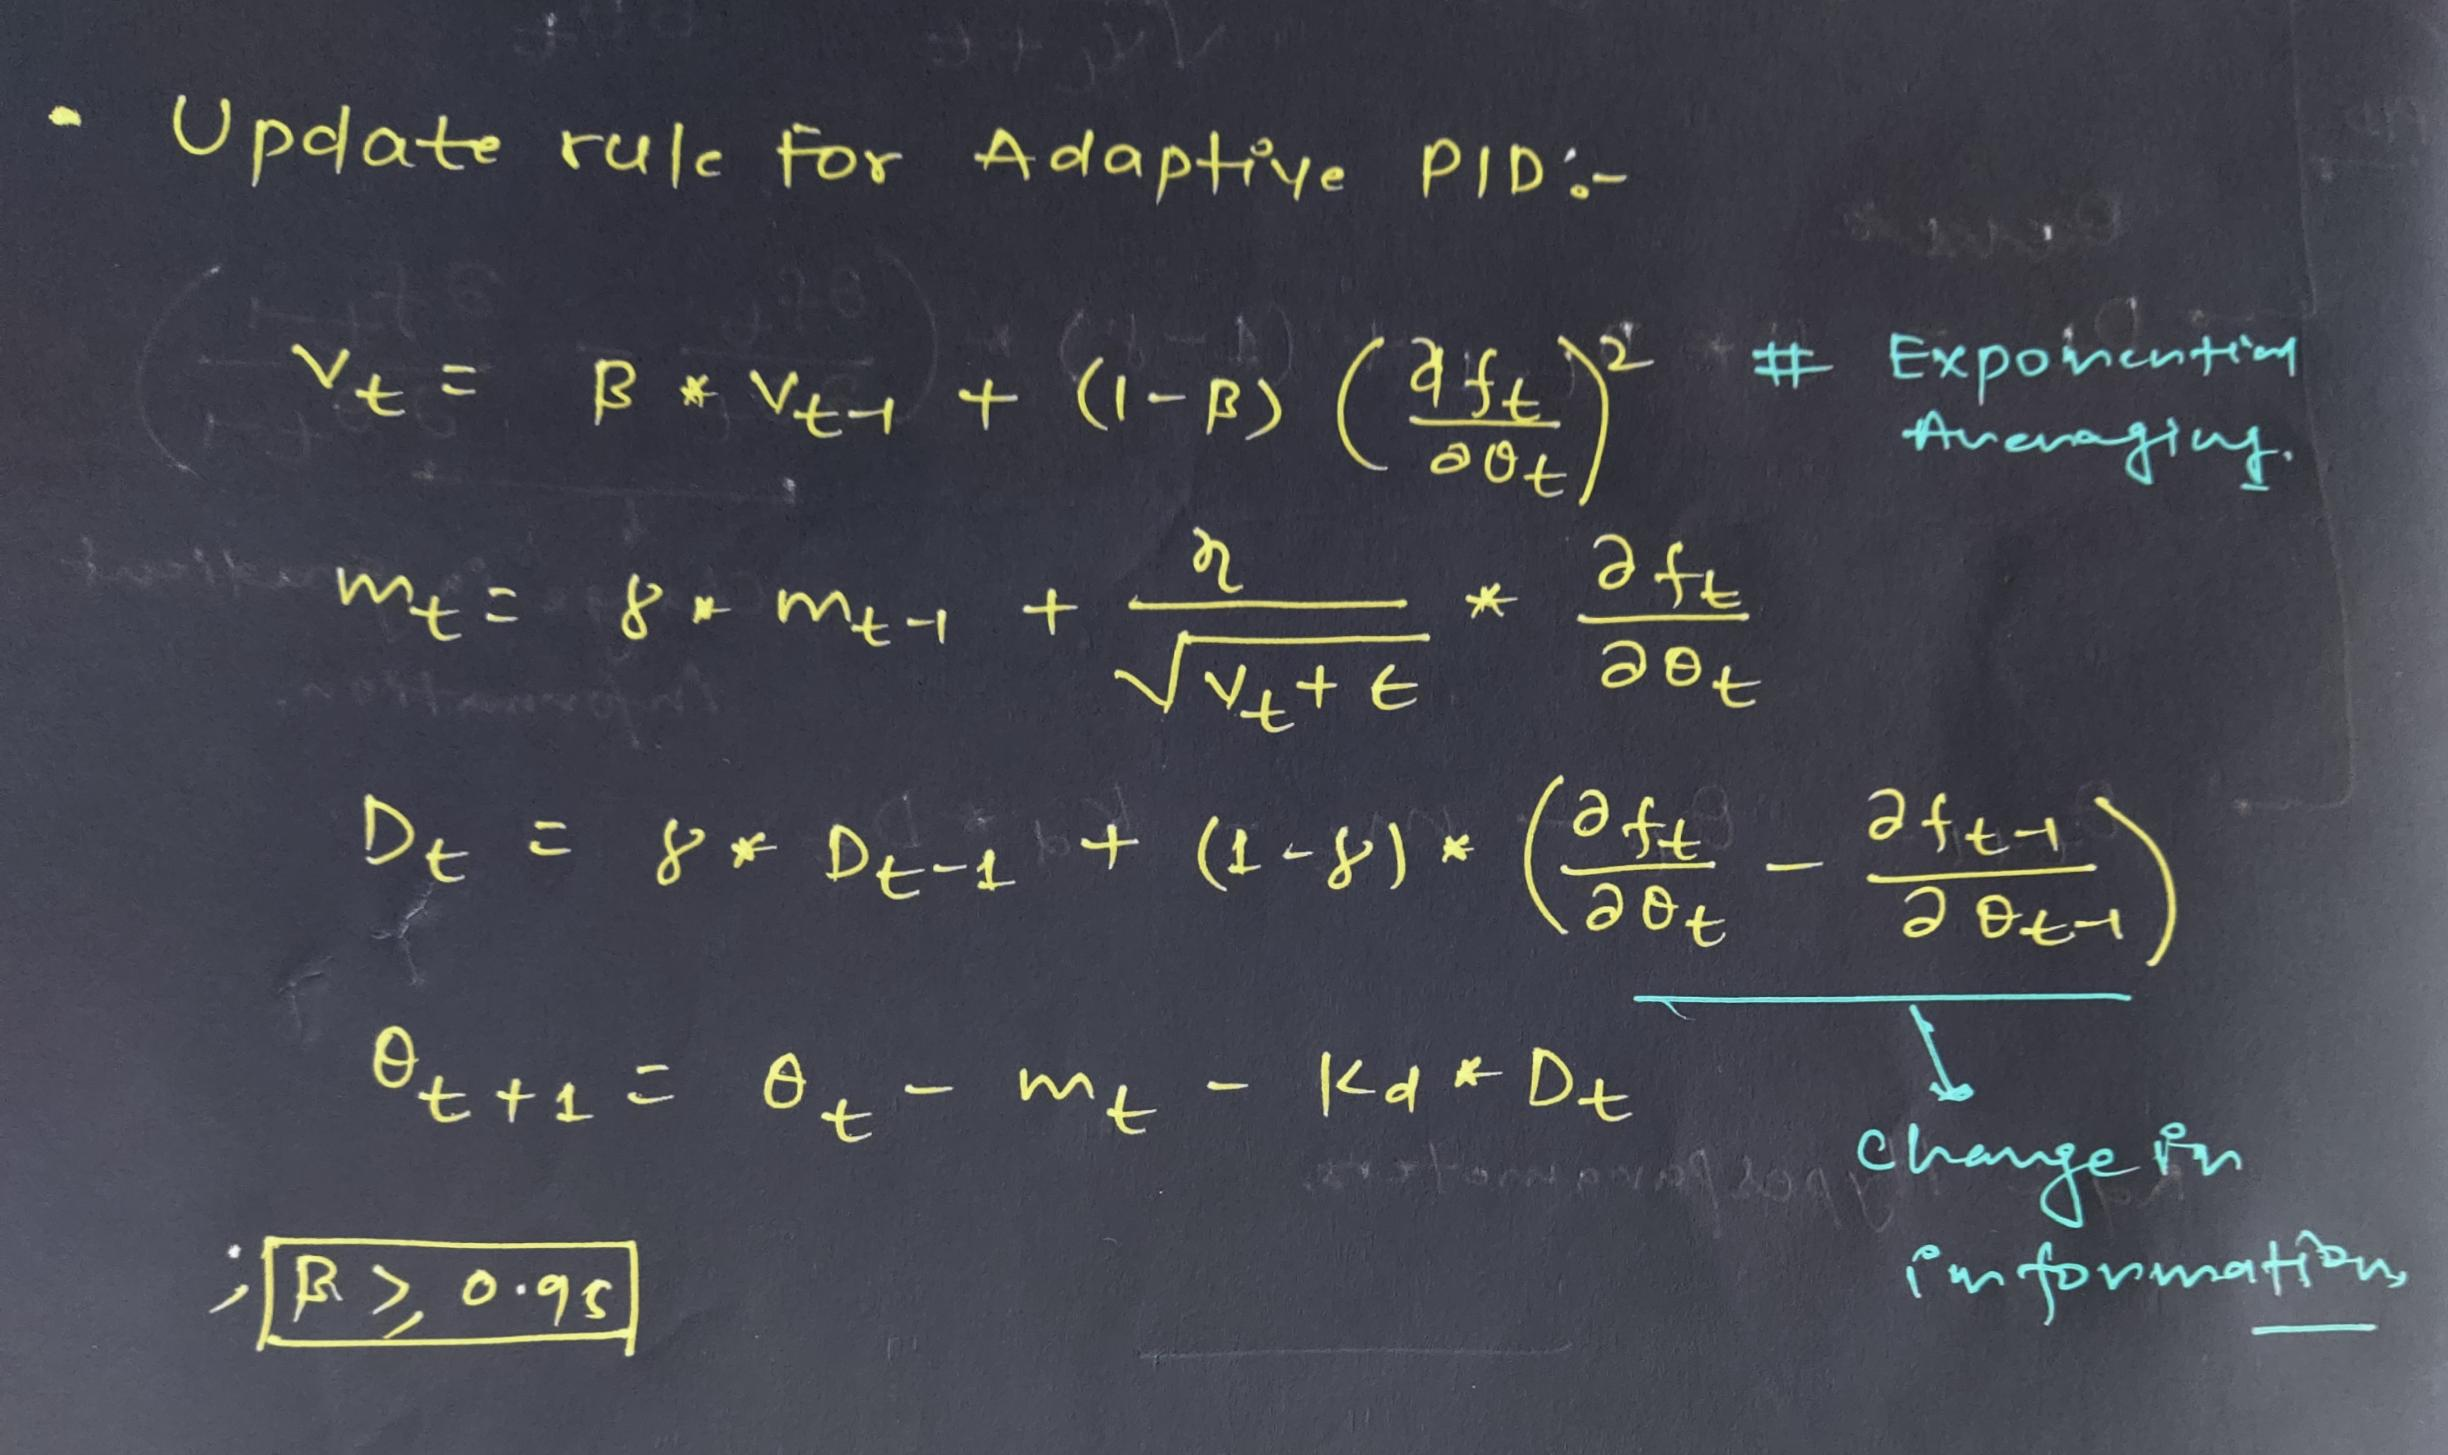

In [ ]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np

from decimal import Decimal, localcontext


In [ ]:
def func(x1, x2):
  return 0.1*x1**2 + 2*x2**2

In [ ]:
def grad_func_x1(x1):
  return 0.2*x1

In [ ]:
def grad_func_x2(x2):
  return 4*x2

#PID

In [ ]:
def PID_Otimizer(lr=0.05, Kd=0.9):
  x1, x2 = -10, -10 #parameters
  gamma = 0.9	

  log = [] # lists to store learning process

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  t=0

  while(1):
    t=t+1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    mt_x1 = gamma*prev_mt_x1 + lr*grad_x1
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1
    prev_grad_x1 = grad_x1

    mt_x2 = gamma*prev_mt_x2 + lr*grad_x2
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2
    prev_grad_x2 = grad_x2

    log.append((x1,x2))

    x1_prev = x1
    x2_prev = x2

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1_prev == x1 and x2_prev == x2):
      break

  return x1, x2, log

In [ ]:
x1, x2, log1 = PID_Otimizer(lr=0.01, Kd=4) #Tried with Kd=2,3,4 problem after Kd>=5 and Kd<0.8
x1, x2, log2 = PID_Otimizer(lr=0.01, Kd=3)
x1, x2, log3 = PID_Otimizer(lr=0.01, Kd=2)
x1, x2, log4 = PID_Otimizer(lr=0.01, Kd=1)
x1, x2, log5 = PID_Otimizer(lr=0.01, Kd=0.9)
x1, x2, log6 = PID_Otimizer(lr=0.01, Kd=0.8)
#x1, x2, log7 = PID_Otimizer(lr=0.01, Kd=0.7)


#Not converging for large value of learning rate.
#Not converging for Kd>=5 and Kd<=0.7

#Adaptive PID

In [ ]:
def Adaptive_PID_RMS(lr = 0.05, Kd = 0.9):
  x1, x2 = -10, -10  #parametrs
  log = []  #list to store the value of x1 and x2 i.e learning 
  
  beta = 0.95

  gamma =0.9 # momentum parameter
  eps = 1e-8

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  vt_x1, vt_x2, prev_vt_x1, prev_vt_x2 = 0,0,0,0  #Introducing for accumulating the magnitude of the gradient

  t = 0

  while(1):    #Until Convergence
    t +=1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)
    
    vt_x1 = beta*prev_vt_x1 +(1-beta)*(grad_x1**2)  #Accumulating the magnitude of the gradient w.r.t first parameters and moreover it is exponential Averaging
    vt_x1_cap = vt_x1/(1 - beta**t)
    mt_x1 = gamma*prev_mt_x1 + (lr*grad_x1)/math.sqrt(vt_x1_cap + eps)
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_grad_x1 = grad_x1
    prev_vt_x1 = vt_x1
    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1

    
    vt_x2 = beta*prev_vt_x2 + (1-beta)*(grad_x2**2) #Accumulating the magnitude of the gradient w.r.t second parameters
    vt_x2_cap = vt_x2/(1 - beta**t)
    mt_x2 = gamma*prev_mt_x2 + (lr*grad_x2)/math.sqrt(vt_x2 + eps)
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_grad_x2 = grad_x2
    prev_vt_x2 = vt_x2
    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2

    prev_x1 = x1
    prev_x2 = x2

    log.append((x1, x2))

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2, log

In [ ]:
x1, x2, log_1 = Adaptive_PID_RMS(lr=0.01, Kd=4) #Kd = 4
#x1, x2, log_2 = Adaptive_PID_RMS(lr=0.01, Kd=3) #Kd = 3
#x1, x2, log_3 = Adaptive_PID_RMS(lr=0.01, Kd=2) #Kd = 2
#x1, x2, log_4 = Adaptive_PID_RMS(lr=0.01, Kd=1) #Kd = 1
#x1, x2, log_5 = Adaptive_PID_RMS(lr=0.01, Kd=0.9) #Kd = 0.9
#x1, x2, log_6 = Adaptive_PID_RMS(lr=0.01, Kd=0.8) #Kd = 0.8
#x1, x2, log_7 = Adaptive_PID_RMS(lr=0.01, Kd=5) #Kd = 5    #Not Converging

#Comparision between PID and Adaptive PID

In [ ]:
%%time
x_val = [l[0] for l in log1]
y_val = [l[1] for l in log1]

x_val_1 = [l[0] for l in log_1]
y_val_1 = [l[1] for l in log_1]



plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between Adagrad, PID and Adaptive PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val,y_val, label='PID Kd=4')
plt.plot(x_val_1,y_val_1, label='Adaptive PID Kd=4')

plt.legend()

plt.show()